<a href="https://colab.research.google.com/github/550tealeaves/DATA-70500-working-with-data/blob/main/HW_6b_SurveyDataAnalysisGESIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Some Analysis of International Social Survey Data

This is a global public opinion data source that lends itself to all sorts of timely questions about religion and politics, among other topics. (The ISSP is an international equivalent to the GSS.) This is the kind of thing that you could do on the research project if you were interested in attitudes about science and technology (and could find an appropriate dataset).


## Activity

1. Download a ISSP data file from the GESIS. Copy the file to your Drive and read it into a data object.
2. Identify a dependent variable to explain.
3. Create one analysis and visualization related to your DV.
4. Sketch out a data story, keeping in mind the principles of DF.

In [1]:
# Code block 1a: Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sb
import math
import matplotlib.pyplot as plt


In [2]:
# Code block 1b: Installing some libraries we'll need
!pip install pyreadstat
!pip install researchpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 24.5 MB/s eta 0:00:00


In [3]:
# Code block 1c: Importing the new library
import researchpy as rp

You can download the data from the GESIS, https://search.gesis.org/research_data/ZA7570 and then copy the files to your Drive and read the data into your notebook.

Here's a link to the codebook: https://dbk.gesis.org/dbksearch/download.asp?id=69690

We'll use the codebook to find some variables of interest and then do some basic analysis and visualization.

Here's the pandas guide to the read method: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_stata.html?highlight=read_stata


In [4]:
# Code block 2: Reading in data
# The format of this data source is an Stata data file, .dta, so we installed a library--pyreadstat--that extends pandas
# by adding another read method, read_stata. We use this to read the file into a new data object.
# I mounted my Drive in this notebook and read the file by copying the local path.

ISSP2018_df = pd.read_stata('ZA7570_v2-1-0.dta', convert_categoricals=False) #does not convert categorical

In [5]:
ISSP2018_df.head()

,studyno,version,doi,country,c_sample,c_alphan,v1,v2,v3,v4,...,US_REG,ZA_REG,CASEID,SUBSCASE,DATEYR,DATEMO,DATEDY,WEIGHT,MODE,PARTIALS
0,7570,2.1.0 (2020-12-01),doi:10.4232/1.13629,40,40,AT,3,3,0,3,...,0,0,2.018000e+15,0,2018,99,99,0.858149,20,1
1,7570,2.1.0 (2020-12-01),doi:10.4232/1.13629,40,40,AT,1,1,0,4,...,0,0,2.018000e+15,0,2018,99,99,0.543920,20,1
2,7570,2.1.0 (2020-12-01),doi:10.4232/1.13629,40,40,AT,1,1,0,4,...,0,0,2.018000e+15,0,2018,99,99,0.858149,20,1
3,7570,2.1.0 (2020-12-01),doi:10.4232/1.13629,40,40,AT,2,2,0,1,...,0,0,2.018000e+15,0,2018,99,99,1.298201,20,1
4,7570,2.1.0 (2020-12-01),doi:10.4232/1.13629,40,40,AT,2,1,0,8,...,0,0,2.018000e+15,0,2018,99,99,3.069912,20,1


In [6]:
ISSP2018_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46267 entries, 0 to 46266
Data columns (total 492 columns):
 #    Column    Dtype  
---   ------    -----  
 0    studyno   int16  
 1    version   object 
 2    doi       object 
 3    country   int16  
 4    c_sample  int32  
 5    c_alphan  object 
 6    v1        int8   
 7    v2        int8   
 8    v3        int8   
 9    v4        int8   
 10   v5        int8   
 11   v6        int8   
 12   v7        int8   
 13   v8        int8   
 14   v9        int8   
 15   v10       int8   
 16   v11       int8   
 17   v12       int8   
 18   v13       int8   
 19   v14       int8   
 20   v15       int8   
 21   v16       int8   
 22   v17       int8   
 23   v18       int8   
 24   v19       int8   
 25   v20       int8   
 26   v21       int8   
 27   v22       int8   
 28   v23       int8   
 29   v24       int8   
 30   v25       int8   
 31   v26       int8   
 32   v27       int8   
 33   v28       int8   
 34   v29       int8   
 3

In [7]:
# Code block 3: Inspecting variables
# Relationship I want to look it is how do different countries view gender roles within a marriage based on if they have ever worked?

ISSP2018_df['v6'] # Q6 Husband earns money, wife's job is family

,v6
0,4
1,4
2,5
3,2
4,3
...,...
46262,4
46263,5
46264,4
46265,1


In [31]:
# Recode the variable to exclude missing cases
# 1 - Strongly agree
# 2 - Agree
# 3 - Neither agree nor disagree
# 4 - Disagree
# 5 - Strongly disagree
# 8 - Can't choose
# 9 - No answer
ISSP2018_df['v6r'] = np.where(ISSP2018_df['v6'] > 6, np.nan, ISSP2018_df['v6'])
ISSP2018_df['v6r']

,v6r
0,4.0
1,4.0
2,5.0
3,2.0
4,3.0
...,...
46262,4.0
46263,5.0
46264,4.0
46265,1.0


In [26]:
ISSP2018_df['WORK'] # Are you currently working for pay, did you work for pay in the past, or have you never been in paid work?

,WORK
0,1
1,1
2,1
3,1
4,1
...,...
46262,2
46263,3
46264,3
46265,2


In [27]:
# Recode the variable to exclude missing cases
# 1 - I am currently in paid work
# 2 - I am currently not in paid work, but I had paid work in the past
# 3 - I have never had paid work
# 9 - No answer
ISSP2018_df['WORKr'] = np.where(ISSP2018_df['WORK'] > 3, np.nan, ISSP2018_df['WORK'])
ISSP2018_df['WORKr']

,WORKr
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
46262,2.0
46263,3.0
46264,3.0
46265,2.0


In [28]:
# Code block 4a: Analysis with a crosstabulation (bivariate percentage table)
crosstab, sigtab = rp.crosstab(ISSP2018_df.v6r, ISSP2018_df.WORKr, prop='col', test='chi-square')
crosstab


/usr/local/lib/python3.10/dist-packages/researchpy/crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 8.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


WORKr                        
WORKr     1.0     2.0     3.0     All
v6r                                  
1.0      5.97    9.99   12.39    7.99
2.0     12.47   17.59   20.87   15.06
3.0     18.35   21.47   20.34   19.60
4.0     25.34   25.32   25.41   25.34
5.0     37.87   25.62   20.99   32.01
All    100.00  100.00  100.00  100.00

In [29]:
print(sigtab)

                Chi-square test    results
0  Pearson Chi-square ( 8.0) =   1287.4495
1                    p-value =      0.0000
2                 Cramer's V =      0.1198


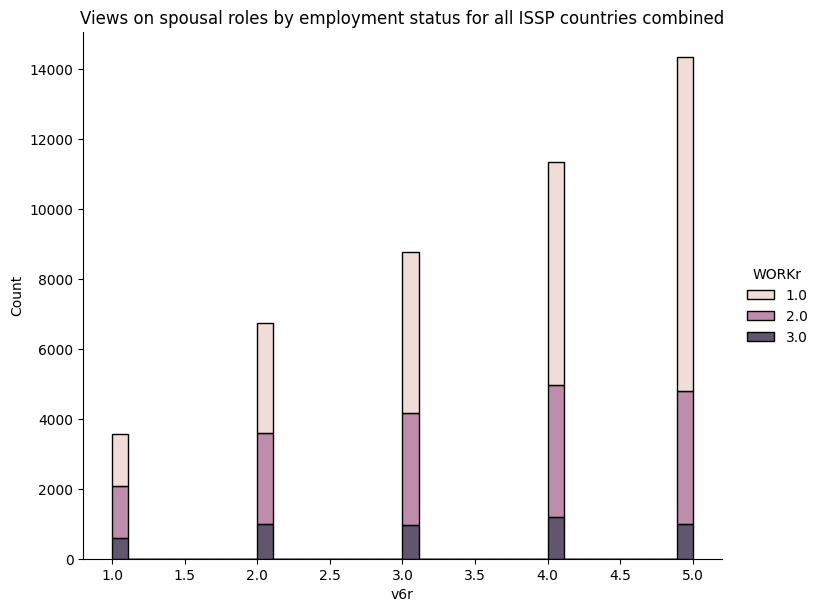

In [30]:
p = sb.displot(ISSP2018_df, x='v6r', hue='WORKr', multiple="stack", height=6, aspect=1.25)
plt.title('Views on spousal roles by employment status for all ISSP countries combined')
plt.show()

## Summary

1.   Overall, most of the internationl respondents strongly disagreed that the husband's job was to earn money and the wife's job was to look after the home and family based on whether they were currently, formerly, or never had worked
2.   For those currently working, there was an increase as the responses change. From one end to the other (from answer choice 1 to 5) the percentage of currently working that responded increased - so choice 5 has the highest percentage of working respondents and choice 1 has the lowest.
3. The number of respondents who currently were not at paid work but had formerly been did not drastically increase in the same way as those who currently had paid work. Choices 2 & 3 and then 4 & 5 look to have the same amount of respondents.
4. For those who never had paid work, the number of responses for each answer choice was pretty consistent, but 1 (Strongly Agree) had the fewest responses. This could be due to just an overall smaller number of never working respondents existing.  



